# Пишем свой метод логистической регрессии

#### импортируем необходимвые библиотеки

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn import datasets
from warnings import filterwarnings
filterwarnings('ignore')

#### загрузим наш датасет IRIS

In [25]:
iris = datasets.load_iris()

In [26]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Оставим два типа iris

In [27]:
X = iris.data[:, :2]
y = (iris.target != 0) * 1

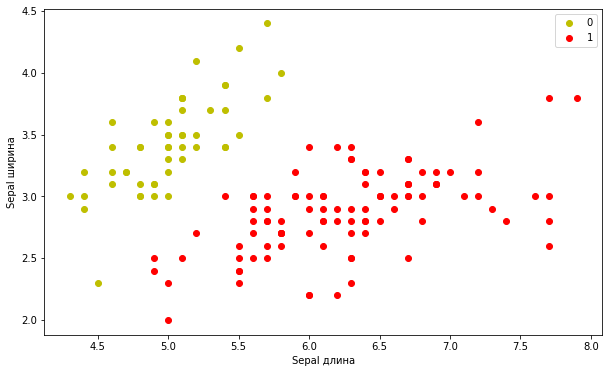

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='y', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.xlabel('Sepal длина')
plt.ylabel('Sepal ширина')
plt.legend();

### Напишем класс LogReg в котором будут методы обучения и предсказывания

In [37]:
class LogReg:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

### Теперь мы можем попробовать создать объекс модели, используя наш класс

In [40]:
lr = LogReg(lr=0.1, num_iter=200000)

In [45]:
# отобразим сколькоь будет обучаться модель
%time lr.fit(X, y)

CPU times: user 11.6 s, sys: 20.8 ms, total: 11.6 s
Wall time: 11.6 s


#### Сравним резуьтат предсказывания с нашими ответами.

In [59]:
predict = model.predict(X)
print("Точность модели: " + str((predict == y).mean()))

Точность модели: 1.0


### Построим график по нашей модели.

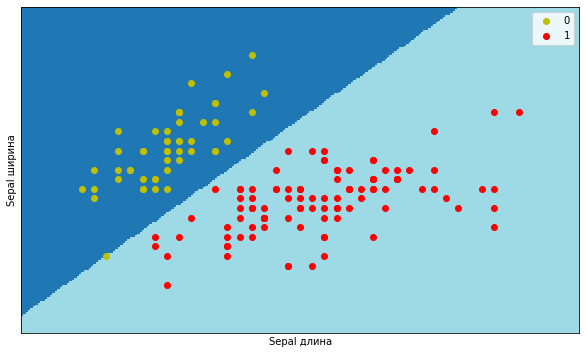

In [70]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.tab20)

# Plot also the training points
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='y', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.xlabel('Sepal длина')
plt.ylabel('Sepal ширина')
plt.legend()


plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Теперь построим модель из библиотеки sklearn и сравним результат.

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
model = LogisticRegression(C=1e20)

In [62]:
%time model.fit(X, y)

CPU times: user 1.68 ms, sys: 97 µs, total: 1.77 ms
Wall time: 1.32 ms


LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
print("Точность модели: " + str(model.score(X, y)))

Точность модели: 1.0


### Построим график по модели из sklearn

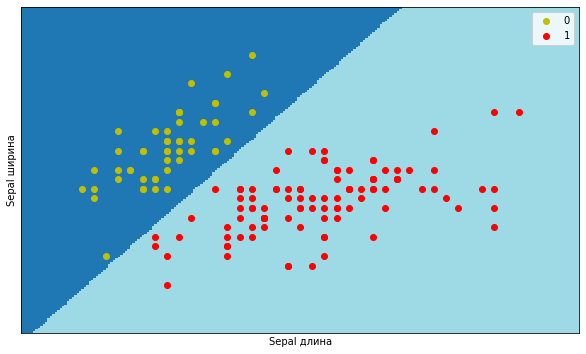

In [71]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.tab20)

# Plot also the training points
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='y', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.xlabel('Sepal длина')
plt.ylabel('Sepal ширина')
plt.legend()


plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Результаты получились одинаковые. На графике мы видим идеальное разделение.